In [1]:
## set those accordingly
datadir = '../Datasets/'
abcd_path = abcd_path = 'C:\\Users\\siddbist\\Downloads\\ABCDGraphGenerator.jl-master\\ABCDGraphGenerator.jl-master\\utils'

In [2]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from collections import Counter
import os
import umap
import pickle
import partition_igraph
import subprocess
from sklearn.metrics import adjusted_mutual_info_score as AMI
from sklearn.preprocessing import MultiLabelBinarizer

## we use those for the book, but you can change to other colors
cls_edges = 'gainsboro'
cls = ['silver','dimgray','black']

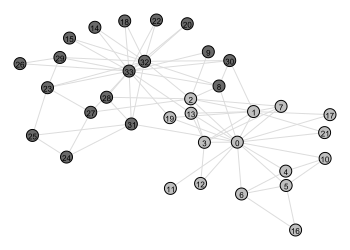

In [3]:
#Question 01
# set the up the Zachary Karate Graph
z = ig.Graph.Famous('zachary')
z.vs['size'] = 12
z.vs['name'] = [str(i) for i in range(z.vcount())]
z.vs['label'] = [str(i) for i in range(z.vcount())]
z.vs['label_size'] = 8
z.es['color'] = cls_edges
z.vs['comm'] = [0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]
z.vs['color'] = [cls[i] for i in z.vs['comm']]
#ig.plot(z, 'zachary_gt.eps', bbox=(0,0,300,200))
ig.plot(z, bbox=(0,0,350,250))

In [4]:
#ECG Algorithm
ecg1 = z.community_ecg()
print(ecg1)
#AMI value
print(AMI(z.vs['comm'],ecg1.membership))

Clustering with 34 elements and 4 clusters
[0] 0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21
[1] 4, 5, 6, 10, 16
[2] 8, 14, 15, 18, 20, 22, 30, 32, 33
[3] 23, 24, 25, 26, 27, 28, 29, 31
0.559360657922555


In [5]:
#Louvain Algorithm
louv1 = z.community_multilevel()
print(louv1)
#AMI value
print(AMI(z.vs['comm'],louv1.membership))

Clustering with 34 elements and 4 clusters
[0] 0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21
[1] 4, 5, 6, 10, 16
[2] 8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33
[3] 23, 24, 25, 27, 28, 31
0.6711594278801385


In [6]:
#Infomap
info1 = z.community_infomap()
print(info1)
#AMI value
AMI(z.vs['comm'],info1.membership)

Clustering with 34 elements and 3 clusters
[0] 0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21
[1] 4, 5, 6, 10, 16
[2] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33


0.687422347904921

In [7]:
#Label Propagation
label1 = z.community_label_propagation()
print(label1)
#AMI value
AMI(z.vs['comm'],label1.membership)

Clustering with 34 elements and 3 clusters
[0] 0, 1, 2, 3, 7, 8, 11, 12, 13, 17, 19, 21, 30
[1] 4, 5, 6, 10, 16
[2] 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33


0.6068165795778157

In [8]:
#Girvan-Newman
gn1 = z.community_edge_betweenness()
z.vs['gn1'] = gn1.as_clustering(n=1).membership
print('AMI:',AMI(z.vs['comm'],z.vs['gn1']))  ## adjusted mutual information

AMI: 1.2467970487091329e-15


In [9]:
#Girvan-Newman
gn1 = z.community_edge_betweenness()
z.vs['gn1'] = gn1.as_clustering(n=2).membership
print('AMI:',AMI(z.vs['comm'],z.vs['gn1']))  ## adjusted mutual information

AMI: 0.8327564079186137


In [10]:
#Girvan-Newman
gn1 = z.community_edge_betweenness()
z.vs['gn1'] = gn1.as_clustering(n=3).membership
print('AMI:',AMI(z.vs['comm'],z.vs['gn1']))  ## adjusted mutual information

AMI: 0.7626076105302333


In [11]:
#Girvan-Newman
gn1 = z.community_edge_betweenness()
z.vs['gn1'] = gn1.as_clustering(n=4).membership
print('AMI:',AMI(z.vs['comm'],z.vs['gn1']))  ## adjusted mutual information

AMI: 0.6292002863591306


In [12]:
#CNM
cnm1 = z.community_fastgreedy()
z.vs['cnm1'] = cnm1.as_clustering(n=4).membership
print('AMI:',AMI(z.vs['comm'],z.vs['cnm1']))  ## adjusted mutual information

AMI: 0.6377146146502932


In [13]:
cnm1 = z.community_fastgreedy()
z.vs['cnm1'] = cnm1.as_clustering(n=3).membership
print('AMI:',AMI(z.vs['comm'],z.vs['cnm1']))  ## adjusted mutual information

AMI: 0.6807645098886008


In [14]:
cnm1 = z.community_fastgreedy()
z.vs['cnm1'] = cnm1.as_clustering(n=2).membership
print('AMI:',AMI(z.vs['comm'],z.vs['cnm1']))  ## adjusted mutual information

AMI: 0.8334659946350966


In [15]:
cnm1 = z.community_fastgreedy()
z.vs['cnm1'] = cnm1.as_clustering(n=1).membership
print('AMI:',AMI(z.vs['comm'],z.vs['cnm1']))  ## adjusted mutual information

AMI: 1.2467970487091329e-15


In [16]:
#Question 02 using Github ML graph

#Generate git hub dev graph
## GitHub Developers (undirected)
D = pd.read_csv(datadir+'GitHubDevelopers/musae_git_edges.csv')
tuples = [tuple(x) for x in D.values]
git = ig.Graph.TupleList(tuples, directed = False)

## read node features
X = pd.read_csv(datadir+'GitHubDevelopers/musae_git_target.csv')

## map node names in edgelist to indices in the graph
idx = [int(i) for i in git.vs['name']]
sorterIndex = dict(zip(idx,range(len(idx))))
X['Rank'] = X['id'].map(sorterIndex) 
X.sort_values(['Rank'], ascending=[True],inplace=True)
X.dropna(inplace=True)

cls = ['grey','black'] ## node colors
lbl = ['web','ml']     ## node labels
git.es['color'] = 'grey' ## edge color

## there are 2 node types: ml or web
git.vs['color'] = [cls[i] for i in list(X['ml_target'])]
git.vs['lbl'] = [lbl[i] for i in list(X['ml_target'])]

In [17]:
#generate ml subgraph
#Generate ml and web graph
gh_ml = git.subgraph([v for v in git.vs() if v['lbl']=='ml'])
#drop isolated vertices and remove any loops
gh_ml = gh_ml.subgraph([v for v in gh_ml.vs() if v.degree()>0])
gh_ml = gh_ml.simplify(multiple=False)

In [18]:
print(gh_ml.community_ecg())

Clustering with 7431 elements and 254 clusters
[  0] 6067, 20183
[  1] 18029, 5916, 27768, 33, 5398, 59, 13761, 36620, 28451, 14878, 7183, 117,
      26843, 9667, 18035, 27631, 31713, 6957, 33401, 29701, 1163, 35794,
      16631, 8142, 25113, 2147, 32311, 369, 2029, 370, 25122, 17792, 31379,
      20657, 390, 10933, 23629, 35899, 32016, 7635, 2925, 2907, 34187, 5714,
      28909, 11935, 706, 25839, 4081, 23160, 18458, 18402, 3724, 12772, 15514,
      694, 29484, 643, 30727, 667, 21084, 543, 13689, 6946, 17711, 6678,
      17841, 759, 29046, 764, 5794, 24727, 10118, 14957, 15417, 17027, 6196,
      20369, 37541, 34888, 35731, 970, 14179, 990, 1534, 14209, 1005, 14684,
      1053, 22623, 29019, 16131, 1054, 36570, 1094, 28065, 17790, 33345,
      22756, 1208, 27354, 4771, 1239, 5030, 7249, 1364, 25292, 1421, 7496,
      33998, 19036, 28605, 10349, 11211, 15681, 11421, 2455, 31036, 8153,
      12848, 13144, 32013, 13255, 27066, 13400, 26444, 4664, 32979, 33167,
      14976, 34442, 12081, 

In [19]:
print(gh_ml.community_multilevel())

Clustering with 7431 elements and 195 clusters
[  0] 6067, 20183
[  1] 18029, 5916, 33, 5398, 101, 6114, 36681, 34423, 36620, 14878, 7183,
      32897, 27631, 172, 36771, 25113, 18309, 370, 25122, 17792, 14761, 390,
      10933, 8120, 29114, 3125, 23629, 2331, 7449, 19988, 19682, 24278, 15590,
      13253, 26720, 10803, 14305, 410, 35899, 32016, 472, 7635, 2925, 2907,
      11935, 25839, 529, 10661, 31442, 37058, 23467, 16725, 18458, 1967,
      18402, 20246, 3724, 12772, 15514, 694, 6625, 4559, 6946, 764, 5794,
      24727, 10118, 11185, 14957, 15417, 14915, 5945, 30137, 930, 31323, 1917,
      35731, 22360, 28564, 960, 33144, 970, 14179, 18296, 990, 1534, 1053,
      22623, 29019, 16131, 1054, 36570, 16260, 16307, 17459, 24672, 28065,
      8028, 32805, 1744, 34251, 17790, 19054, 10651, 5149, 16165, 12994,
      22756, 1208, 27354, 4771, 1239, 9639, 1364, 1374, 32708, 7035, 26525,
      9840, 34569, 28605, 11211, 20201, 15681, 30060, 4930, 2455, 3042, 13144,
      32013, 13255, 4664,

In [20]:
print(gh_ml.community_infomap())

Clustering with 7431 elements and 847 clusters
[  0] 6067, 20183
[  1] 18029, 17792, 694, 764, 24727, 14957, 15417, 1054, 17790, 13144, 14976,
      35362, 7955, 9306, 11769, 2004, 35221, 29999, 23560, 16774, 26583,
      15419, 2944, 13364, 24757, 7937, 29897, 5014, 22912, 7533, 5956, 7175,
      29064, 12800, 26278, 12785, 9652, 34171, 9857, 12399, 21039, 12910,
      25363, 13727, 32231, 18013, 20556, 28473, 15610, 16840, 17178, 10448,
      11323, 31245, 5325
[  2] 5916, 17459, 13491, 14927, 19860, 3232, 33438, 32450, 36929, 31007
[  3] 4, 9342
[  4] 14003, 414, 492, 22534, 22844, 31831, 9871, 18324, 27015, 33694, 12153
[  5] 23914, 14528, 29269, 2122, 4154, 5715, 8772, 21767, 1558, 23707, 24702,
      37012, 26790, 7355, 20876
[  6] 27768, 28909, 15568, 19454, 15273, 7522, 1614, 31396, 11062, 2576,
      16729, 17718, 8984, 9117, 32353, 28287, 13182, 17559, 19807, 29770,
      25387, 34519
[  7] 35842, 16641, 1935, 15293, 19725, 2388, 14005, 3654, 37225, 4222, 12140,
      24391, 

In [21]:
print(gh_ml.community_label_propagation())

Clustering with 7431 elements and 225 clusters
[  0] 6067, 20183
[  1] 18029, 5916, 14003, 23914, 27768, 35842, 23589, 34238, 4708, 19256,
      14478, 1407, 16641, 21934, 22321, 23783, 2992, 36632, 20919, 1315, 7976,
      14805, 17091, 24094, 12798, 37475, 11225, 32452, 33424, 7847, 3582,
      12838, 13090, 35668, 34059, 23051, 10808, 23880, 32, 4293, 22351, 33,
      5398, 34, 27804, 18741, 22615, 15919, 2417, 15407, 25218, 18028, 9804,
      3374, 36659, 30948, 24939, 12542, 1193, 28234, 4036, 35665, 49, 5552,
      26597, 10269, 7121, 27985, 22212, 6138, 59, 13761, 8357, 62, 30717,
      29023, 72, 1353, 15745, 1089, 31923, 32409, 79, 33601, 83, 26110, 25858,
      5858, 2489, 35708, 18373, 28603, 90, 24444, 15808, 13893, 30931, 23271,
      11591, 1139, 34042, 19400, 36310, 8508, 27101, 6149, 3190, 13506, 19728,
      6081, 9355, 31814, 28544, 3218, 99, 36916, 11442, 32812, 10060, 29115,
      31324, 34603, 8507, 14459, 338, 6082, 14815, 101, 32525, 35212, 6114,
      6479, 1316

In [22]:
#setting ecg value as true label and change label predict to other clustering algo and calculating AMI score
AMI(gh_ml.community_ecg().membership,gh_ml.community_infomap().membership)
AMI(gh_ml.community_ecg().membership,gh_ml.community_label_propagation().membership)

0.22820083222763782

In [23]:
#CNM 
gn2 = gh_ml.community_fastgreedy()
ig.plot(gn2,bbox=(0,0,300,300))

In [ ]:
#VERY SLOW MIGHT NOT RUN
gn2 = gh_ml.community_edge_betweenness()
ig.plot(gn2,bbox=(0,0,300,300))

In [ ]:
#Question05
#create ABCD graph with 100 nodes
## read graph and communities
g = ig.Graph.Read_Ncol(datadir+'ABCD/abcd_100.dat',directed=False)
c = np.loadtxt(datadir+'ABCD/abcd_100_comms.dat',dtype='uint16',usecols=(1))
g.vs['comm'] = [c[int(x['name'])-1]-1 for x in g.vs]
gt = {k:(v-1) for k,v in enumerate(g.vs['comm'])}
# ## map between int(name) to key
n2k = {int(v):k for k,v in enumerate(g.vs['name'])}
g.vs['size'] = 7
g.es['color'] = cls_edges
g.vs['color'] = [cls[i] for i in g.vs['comm']]
ig.plot(g, bbox=(0,0,300,200))

In [ ]:
## internal degrees
## g.vs['g] represents the z(v) value
in_deg_0 = g.subgraph_edges([e for e in g.es if g.vs['comm'][e.tuple[0]]==0 and g.vs['comm'][e.tuple[1]]==0],
                            delete_vertices=False).degree()
in_deg_1 = g.subgraph_edges([e for e in g.es if g.vs['comm'][e.tuple[0]]==1 and g.vs['comm'][e.tuple[1]]==1],
                            delete_vertices=False).degree()

## compute z (normalized within-module degree)
g.vs['in_deg'] = [in_deg_0[i] + in_deg_1[i] for i in range(g.vcount())]
mu = [np.mean([x for x in in_deg_0 if x>0]),np.mean([x for x in in_deg_1 if x>0])]
sig = [np.std([x for x in in_deg_0 if x>0],ddof=1),np.std([x for x in in_deg_1 if x>0],ddof=1)]

for v in g.vs:
    if v['comm'] == 2:
        break
    else:
        g.vs['g'] = [(v['in_deg']-mu[v['comm']])/sig[v['comm']]]


## computing p (participation coefficient)
g.vs['deg'] = g.degree()
g.vs['out_deg'] = [v['deg'] - v['in_deg'] for v in g.vs]
g.vs['p'] = [1-(v['in_deg']/v['deg'])**2-(v['out_deg']/v['deg'])**2 for v in g.vs]
D = pd.DataFrame(np.array([g.vs['g'],g.vs['p']]).transpose(),columns=['g','p']).sort_values(by='g',ascending=False)
D.head(8)
#print('finished')

In [ ]:
## plotting w.r.t. z (z>2.5 are hubs, shown as squares)
## color positive values in dark, negative in white
## largest values for node 0 (instructor) and node 33 (president) and node 32
#v['g'] is the z(v) value
g.vs['color'] = 'black'
g.vs['shape'] = 'circle'
for v in g.vs:
    if v['g']<2.5: ## non-hub
        if v['p'] < 0.62 and v['p'] >= 0.05: ## peripheral
            v['color'] = 'dimgrey'
        if v['p'] < 0.05: ## ultra-peripheral
            v['color'] = 'gainsboro'
        if v['p'] < 0.80 and v['p'] >= 0.62: ## connector-nodes
            v['color'] = 'red'
        if v['p'] >= 0.80: ## kinless nodes
            v['color'] = 'blue'
            
    if v['g'] >=2.5: #hub
        if v['g']>=2.5 and v['p'] < 0.3: ## hubs (provincial)            
            v['color'] = 'silver'
            v['shape'] = 'square'
        if v['g']>=0.3 and v['p'] < 0.75: ## hubs (connector)            
            v['color'] = 'silver'
            v['shape'] = 'triangle'
        if v['g']>=0.75: ## hubs (kinless)            
            v['color'] = 'purple'
            v['shape'] = 'circle'
#ig.plot(z, 'zachary_roles_1.eps', bbox=(0,0,350,250))
ig.plot(g, bbox=(0,0,350,250))

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))
ax.scatter(g.vs['p'],g.vs['g'],marker='o',s=75, color='k')

#Move this line as all nodes are provinical hubs
plt.plot([0, .5], [2.5, 2.5], color='k', linestyle='-', linewidth=2)
plt.plot([.05, .05], [-.5, 2.4], color='k', linestyle='-', linewidth=2)

plt.xlabel('participation coefficient (p)',fontsize=16)
plt.ylabel('normalized within module degree (z)',fontsize=16);

In [ ]:
#Question 06
#ABCD100.dat
#abcd100.dat
#Start with 100 nodes

g = ig.Graph.Read_Ncol(datadir+'ABCD/abcd_100.dat',directed=False)
c = np.loadtxt(datadir+'ABCD/abcd_100_comms.dat',dtype='uint16',usecols=(1))
g.vs['comm'] = [c[int(x['name'])-1]-1 for x in g.vs]

In [ ]:
import time
t0 = time.process_time()
ecg = g.community_ecg()
t1 = time.process_time() - t0
print("Time elapsed: ", t1)
print(ecg)

In [ ]:
t0 = time.process_time()
louv = g.community_multilevel()
t1 = time.process_time() - t0
print("Time elapsed: ", t1)
print(louv)

In [ ]:
t0 = time.process_time()
imap = g.community_infomap()
t1 = time.process_time() - t0
print("Time elapsed: ", t1)
print(imap)

In [ ]:
t0 = time.process_time()
labprop = g.community_label_propagation()
t1 = time.process_time() - t0
print("Time elapsed: ", t1)
print(labprop)

In [ ]:
t0 = time.process_time()
gn = g.community_edge_betweenness()
t1 = time.process_time() - t0
print("Time elapsed: ", t1)
ig.plot(gn,bbox=(0,0,300,300))

In [ ]:
t0 = time.process_time()
cnm = g.community_fastgreedy()
t1 = time.process_time() - t0
print("Time elapsed: ", t1)
ig.plot(cnm,bbox=(0,0,300,300))

In [ ]:
#1000 nodes
g = ig.Graph.Read_Ncol(datadir+'ABCD/abcd_1000.dat',directed=False)
c = np.loadtxt(datadir+'ABCD/abcd_1000_comms.dat',dtype='uint16',usecols=(1))
g.vs['comm'] = [c[int(x['name'])-1]-1 for x in g.vs]

In [ ]:
import time
t0 = time.process_time()
ecg = g.community_ecg()
t1 = time.process_time() - t0
print("Time elapsed: ", t1)
print(ecg)

In [ ]:
t0 = time.process_time()
louv = g.community_multilevel()
t1 = time.process_time() - t0
print("Time elapsed: ", t1)
print(louv)

In [ ]:
t0 = time.process_time()
imap = g.community_infomap()
t1 = time.process_time() - t0
print("Time elapsed: ", t1)
print(imap)

In [ ]:
t0 = time.process_time()
labprop = g.community_label_propagation()
t1 = time.process_time() - t0
print("Time elapsed: ", t1)
print(labprop)

In [ ]:
t0 = time.process_time()
cnm = g.community_fastgreedy()
t1 = time.process_time() - t0
print("Time elapsed: ", t1)
ig.plot(cnm,bbox=(0,0,300,300))

In [ ]:
t0 = time.process_time()
gn = g.community_edge_betweenness()
t1 = time.process_time() - t0
print("Time elapsed: ", t1)
ig.plot(gn,bbox=(0,0,300,300))